In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
df.shape

(1258, 6)

In [7]:
import matplotlib.pyplot as plt

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume            object
dtype: object

In [13]:
df['Close'] = df['Close'].str.replace(',', '')

In [14]:
df['Close'] = df['Close'].astype('float32')

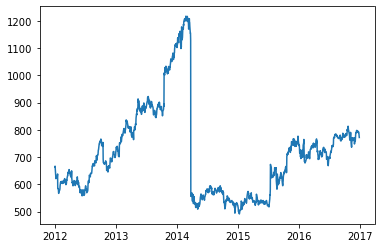

In [15]:
plt.plot(df['Date'], df['Close'])
plt.show()

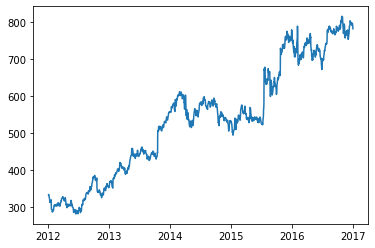

In [16]:
plt.plot(df['Date'], df['High'])
plt.show()

In [25]:
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4:5].values

In [26]:
X[0]

array([325.25, 332.83, 324.97])

In [31]:
X.shape

(1258, 3)

In [27]:
from sklearn.preprocessing import StandardScaler

In [24]:
st = StandardScaler()
X = st.fit_transform(X)

In [28]:
y = st.fit_transform(y)

In [29]:
import numpy as np

In [32]:
X0 = np.ones(X.shape[0])

In [33]:
X = np.c_[X0, X]

In [34]:
X[0]

array([  1.  , 325.25, 332.83, 324.97])

In [35]:
coef = np.zeros(X.shape[1])